# Analysis of shoreside logged MQTT data for out of order messages.

In [16]:
# The logfile has a mix of data an other messages.  We must strip out all messages that are not data.

# Shoreside MQTT Subscriber (topic = oceanus/10001) logfile
mqttLogFile = open('agg_oceanus_shore_10001.log.2', 'r')

# File to hold filtered data
mqttFilterFile = open('agg_oceanus_shore_10001.filter', 'w')

line = mqttLogFile.readline()

while line:
    
    splitLine = line.split(' ')
    
    if len(splitLine) ==23:
        mqttFilterFile.write(line)
    else:
        pass
    
    line = mqttLogFile.readline()

mqttFilterFile.close()
mqttLogFile.close()

# Now that we have only mqtt messages in a file we can look for messages that migh have arrived out of order.

In [39]:
from dateutil import parser

messageHeader0 = '$blahh,277,\x01277:22:26:10,22:26:10,0.135'
messageHeaderSplit0 = messageHeader0.split(',')
messageTime0 = messageHeaderSplit0[3]
T0 = parser.parse(messageTime0)

# Filtered data file
mqttFilterFile = open('agg_oceanus_shore_10001.filter', 'r')

line = mqttFilterFile.readline()
lineNumber = 1

while line:

    message1 = line.split(' ')

    # Parse out message time from message
    messageHeader1 = message1[3]
    messageHeaderSplit1 = messageHeader1.split(',')
    messageTime1 = messageHeaderSplit1[3]
    T1 = parser.parse(messageTime1)
    
    # Check that each message is in the right order
    if T1 < T0:
        print("Out Of Order Message Found on Line #: "+str(lineNumber))
        print(messageTime0)
        print(messageTime1)
    else:
        pass

    # Read a new line to process
    line = mqttFilterFile.readline()
    lineNumber += 1
    
    # Reset all initial time zero variables
    messageHeader0 = messageHeader1
    messageHeaderSplit0 = messageHeaderSplit1
    messageTime0 = messageHeaderSplit1[3]
    T0 = T1
    message0 = message1
    
mqttFilterFile.close()
print("Finished Checking "+str(lineNumber)+" lines")

Out Of Order Message Found on Line #: 4975
23:59:59
00:00:00
Out Of Order Message Found on Line #: 87991
23:59:59
00:00:00
Out Of Order Message Found on Line #: 171388
23:59:59
00:00:00
Out Of Order Message Found on Line #: 251659
23:59:59
00:00:00
Out Of Order Message Found on Line #: 328467
23:59:59
00:00:00
Finished Checking 377738 lines


# Look for gaps in the 1 Hz messages (dropped messages)

Finished checking 377738 lines
Total number of gaps found: 6445
Min Gap: 2.0
Max Gap: 1050.0
Mean Gap: 5.995810705973623
Max Gap: 25.395557485296354


<IPython.core.display.Javascript object>


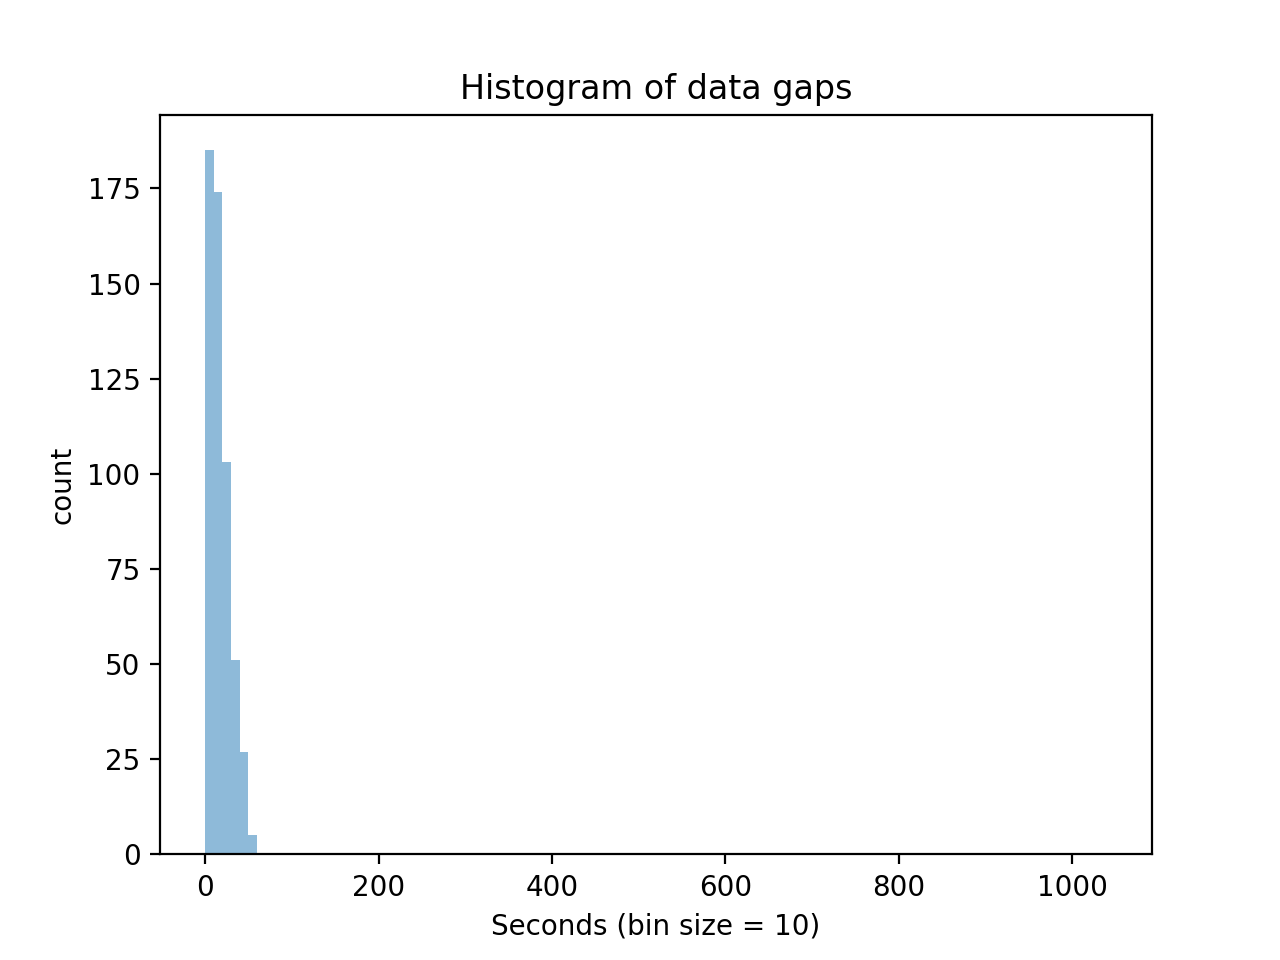

In [66]:
from dateutil import parser
import statistics
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt

# Dummy Record to Get time delta = 1 second
messageHeaderD = '$blahh,277,\x01277:22:26:10,22:26:09,0.135'
messageHeaderSplitD = messageHeaderD.split(',')
messageTimeD = messageHeaderSplitD[3]
TD = parser.parse(messageTimeD)

# First Record In File
messageHeader0 = '$blahh,277,\x01277:22:26:10,22:26:10,0.135'
messageHeaderSplit0 = messageHeader0.split(',')
messageTime0 = messageHeaderSplit0[3]
T0 = parser.parse(messageTime0)

# Get the referece timestep (1Hz)
TDref = T0-TD

# Create an list to hold the timedelta data

TDlist = []

# Filtered data file
mqttFilterFile = open('agg_oceanus_shore_10001.filter', 'r')

line = mqttFilterFile.readline()
lineNumber = 1

while line:

    message1 = line.split(' ')

    # Parse out message time from message
    messageHeader1 = message1[3]
    messageHeaderSplit1 = messageHeader1.split(',')
    messageTime1 = messageHeaderSplit1[3]
    T1 = parser.parse(messageTime1)
    
    # for gaps
    Tdelta = T1 - T0
    TdeltaInt = Tdelta.total_seconds()
    # print("%s" %TDref)
    # print("%s" %Tdelta)
    
    if Tdelta > TDref:
        # print("Gap found on line #:"+str(lineNumber))
        # print("%s" %TdeltaInt)
        TDlist.append(TdeltaInt)
        
    else:
        pass

    # Read a new line to process
    line = mqttFilterFile.readline()
    lineNumber += 1
    
    # Reset all initial time zero variables
    messageHeader0 = messageHeader1
    messageHeaderSplit0 = messageHeaderSplit1
    messageTime0 = messageHeaderSplit1[3]
    T0 = T1
    message0 = message1
    
mqttFilterFile.close()

print("Finished checking "+str(lineNumber)+" lines")
print("Total number of gaps found: "+str(len(TDlist)))
print("Min Gap: "+str(min(TDlist)))
print("Max Gap: "+str(max(TDlist)))
print("Mean Gap: "+str(statistics.mean(TDlist)))
print("Max Gap: "+str(statistics.stdev(TDlist)))

# fixed bin size
bins = np.arange(0, 1050, 10) # fixed bin size
plt.hist(data, bins=bins, alpha=0.5)
plt.title('Histogram of data gaps')
plt.xlabel('Seconds (bin size = 10)')
plt.ylabel('count')

plt.show()

<IPython.core.display.Javascript object>


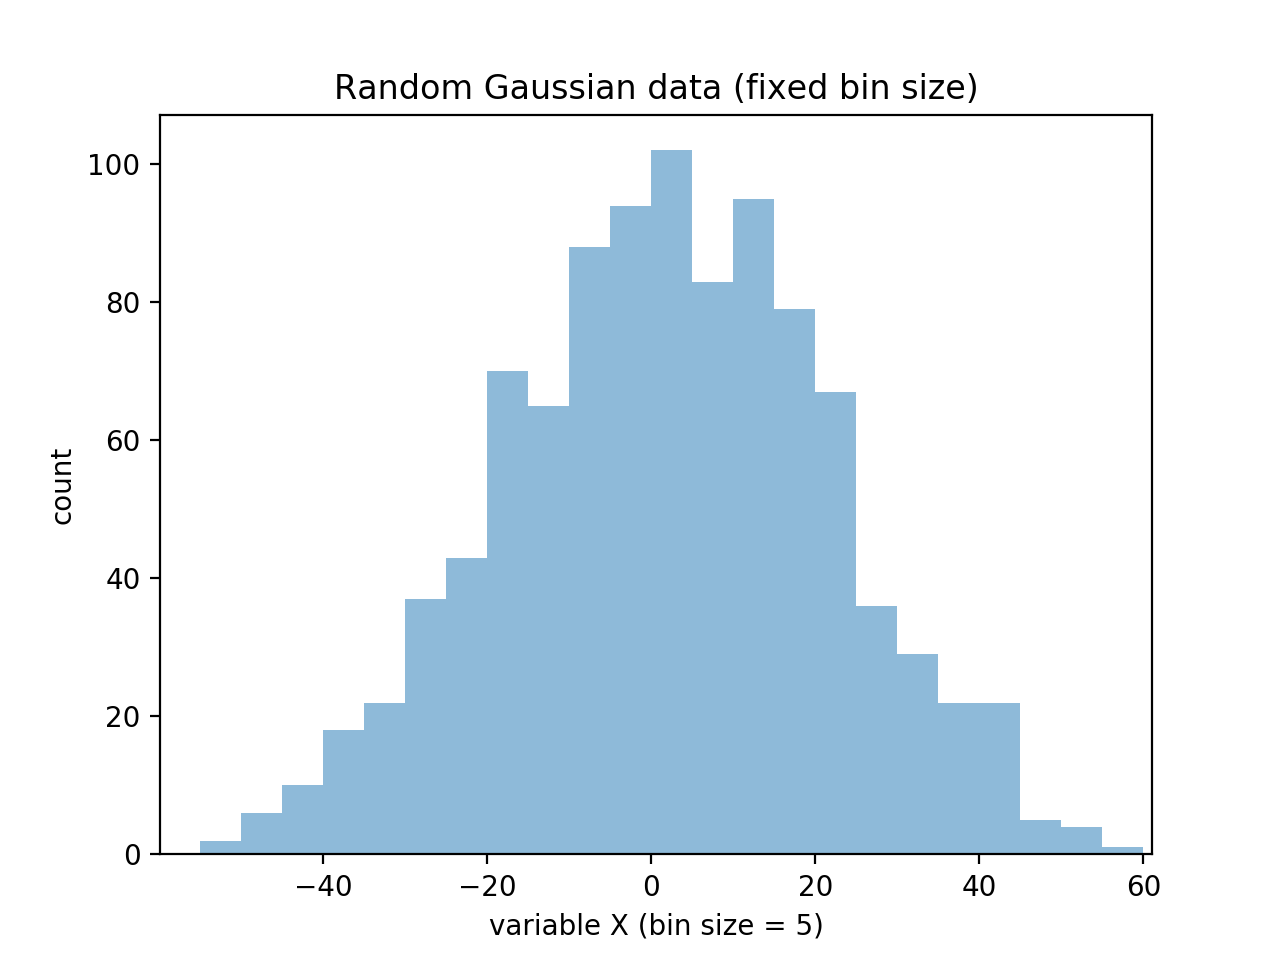

In [63]:
%matplotlib notebook
import numpy as np
import random
from matplotlib import pyplot as plt

data = np.random.normal(0, 20, 1000) 

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed bin size)')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()